In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import skew, shapiro, probplot

In [7]:
data_path = "../data/raw_dataset.xlsx"
data = pd.read_excel(data_path)

In [8]:
data.head()

,Sample No,Distance (Light),Distance (Dark),Be,Cr,Fe,Ni,Cu,As,Cd,Ba,Tl,Pb,U
0,1,7156.338950,9652.248647,0.000000,0.223409,1096.628479,0.528035,34.138471,0.100597,0.000000,1.361877,0.0,0.478250,0.050825
1,2,3683.138750,3623.552118,0.000000,0.060603,4.029080,0.696472,255.213916,0.000000,0.009904,0.452652,0.0,5.572586,0.122109
2,3,12071.226600,13607.163553,0.000000,0.000000,35.391000,0.176000,0.235000,0.281000,0.000000,0.345000,0.0,0.036000,0.396000
3,4,13043.512710,14982.893893,0.000000,0.000000,38.716000,0.289000,0.669000,8.166000,0.000000,9.663000,0.0,0.099000,1.353000
4,5,6314.452792,11545.985009,0.020338,0.000000,407.938826,0.290262,4.060583,717.905585,0.000000,5.453001,0.0,0.509852,0.341408


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sample No         92 non-null     int64  
 1   Distance (Light)  92 non-null     float64
 2   Distance (Dark)   92 non-null     float64
 3   Be                92 non-null     float64
 4   Cr                92 non-null     float64
 5   Fe                92 non-null     float64
 6   Ni                92 non-null     float64
 7   Cu                92 non-null     float64
 8   As                92 non-null     float64
 9   Cd                92 non-null     float64
 10  Ba                92 non-null     float64
 11  Tl                92 non-null     float64
 12  Pb                92 non-null     float64
 13  U                 92 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 10.2 KB


In [10]:
data.describe()

,Sample No,Distance (Light),Distance (Dark),Be,Cr,Fe,Ni,Cu,As,Cd,Ba,Tl,Pb,U
count,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,46.50000,6748.215242,8531.197317,0.025521,0.199539,88.809072,1.139543,141.456027,11.078646,0.028783,13.477403,0.004850,1.620664,56.601541
std,26.70206,3923.364540,5301.259469,0.079785,0.654498,248.230755,1.757192,371.240548,74.880698,0.065268,29.122385,0.032043,3.185443,348.445798
min,1.00000,675.634190,605.659877,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,23.75000,3768.800828,4341.648860,0.000000,0.000000,2.586477,0.087037,5.841773,0.103250,0.000000,0.642814,0.000000,0.099750,0.115832
50%,46.50000,5694.696024,6798.432354,0.000000,0.000000,11.170874,0.330131,32.280000,0.520747,0.006647,3.808702,0.000000,0.359043,1.002258
75%,69.25000,8814.039241,12343.690784,0.000000,0.110000,43.037490,1.217295,139.486275,3.810421,0.020000,9.138607,0.000000,1.151895,8.181147
max,92.00000,18788.776370,24278.777495,0.470000,3.679186,1370.355710,7.110000,3228.014515,717.905585,0.411806,197.641611,0.290000,20.090000,3274.370000


## 1. Identify missing values

In [11]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


There were no missing values

## 2. Analyzing Response Variables 

### 2.1 Y1 - 'Distance (Light)'

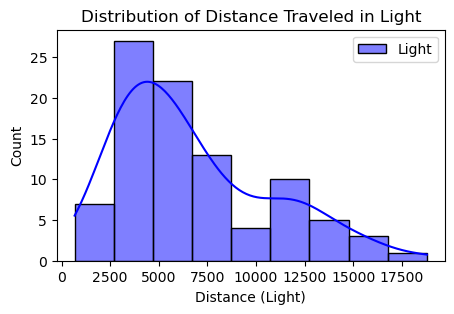

Skewness of y: 0.9281066487882584


In [14]:
# Plot distributions of distances (Light)
plt.figure(figsize=(5, 3))
sns.histplot(data['Distance (Light)'], kde=True, color="blue", label="Light")
plt.legend()
plt.title("Distribution of Distance Traveled in Light")
plt.show()

# Plot distributions of distances (Light)
print("Skewness of y:", skew(data['Distance (Light)']))

- By observing the distribution plot and the skewness, we can observe a positive skewness Y1 - Distance (Light)
- Applying log tranformation would normalize the values and  stabilize variance

### 2.2 Y2 - 'Distance (Dark)'

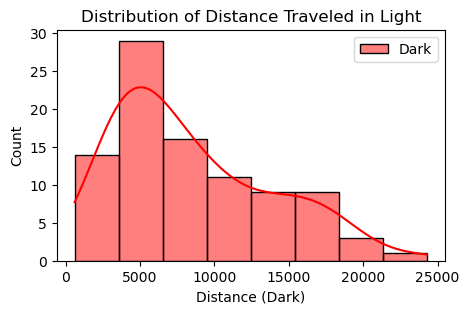

Skewness of y: 0.8081904113239525


In [16]:
# Plot distributions of distances (Dark)
plt.figure(figsize=(5, 3))
sns.histplot(data['Distance (Dark)'], kde=True, color="red", label="Dark")
plt.legend()
plt.title("Distribution of Distance Traveled in Light")
plt.show()

# Plot distributions of distances (Light)
print("Skewness of y:", skew(data['Distance (Dark)']))

- By observing the distribution plot and the skewness, we can observe a positive skewness Y1 - Distance (Light)
- Applying log tranformation would normalize the values and  stabilize variance

## 3. Analyzing Predictor Variables 

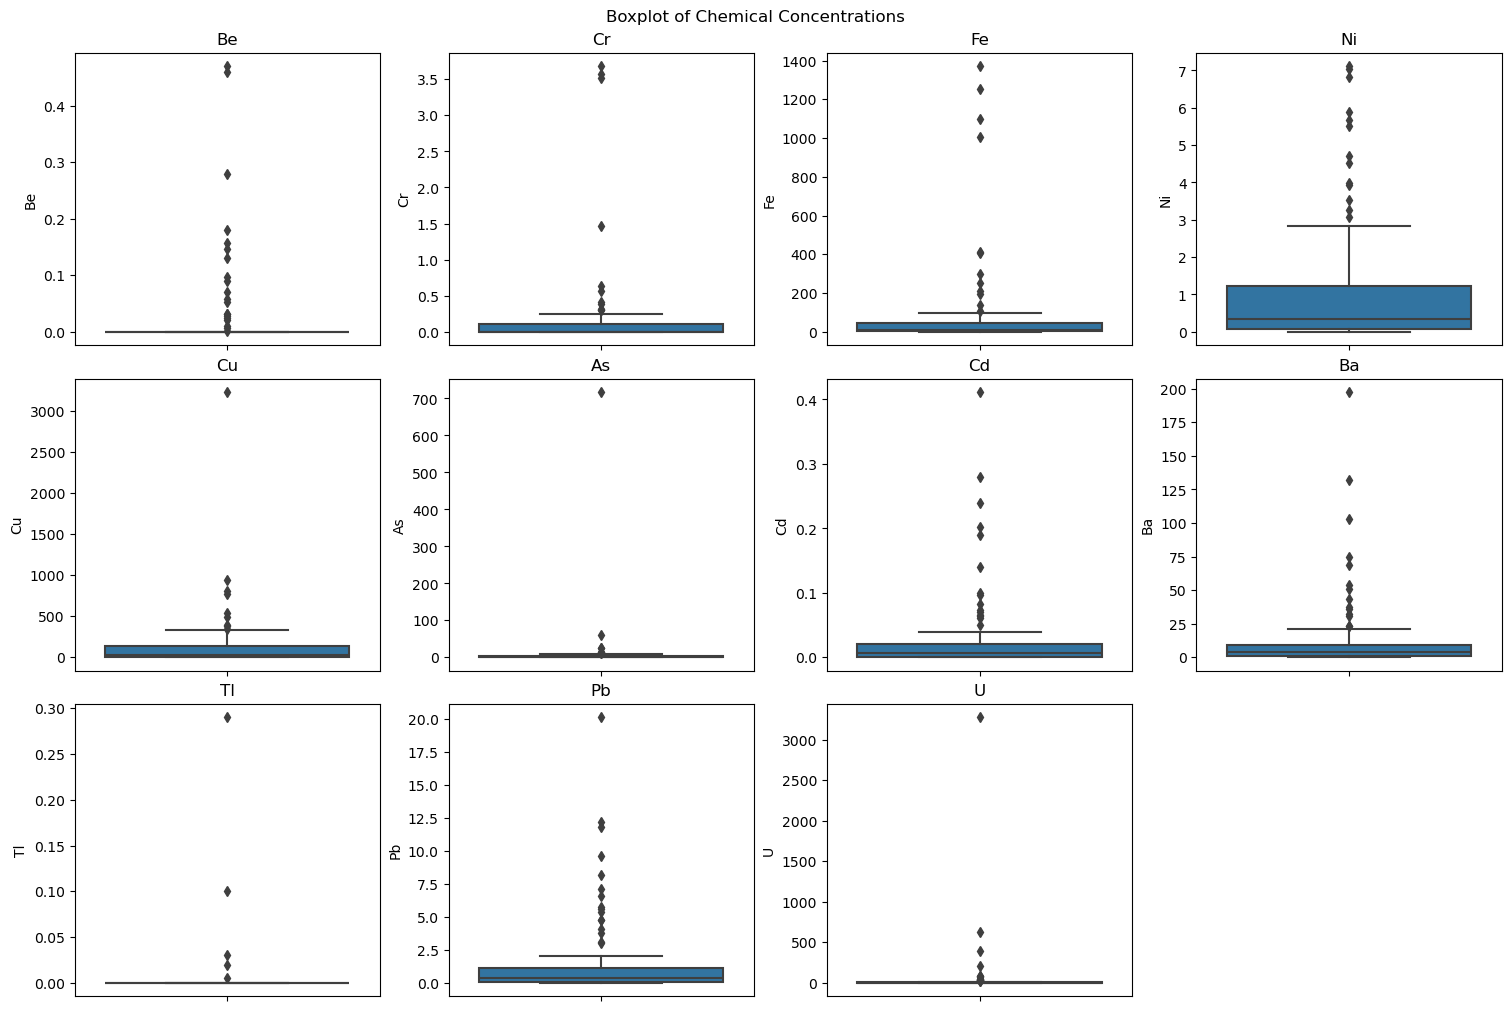

In [17]:
# List of chemical columns
chemical_columns = ['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), constrained_layout=True)
fig.suptitle("Boxplot of Chemical Concentrations")

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each chemical and plot on a separate subplot
for i, chemical in enumerate(chemical_columns):
    sns.boxplot(data=data, y=chemical, ax=axes[i])
    axes[i].set_title(chemical)

# Remove any empty subplots if necessary
for j in range(len(chemical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

Some potential outliers and few different scales of predictor variables can be identified. Therefore applying min-max transformation will be better

## 4 Analyzing Relationship between variables

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


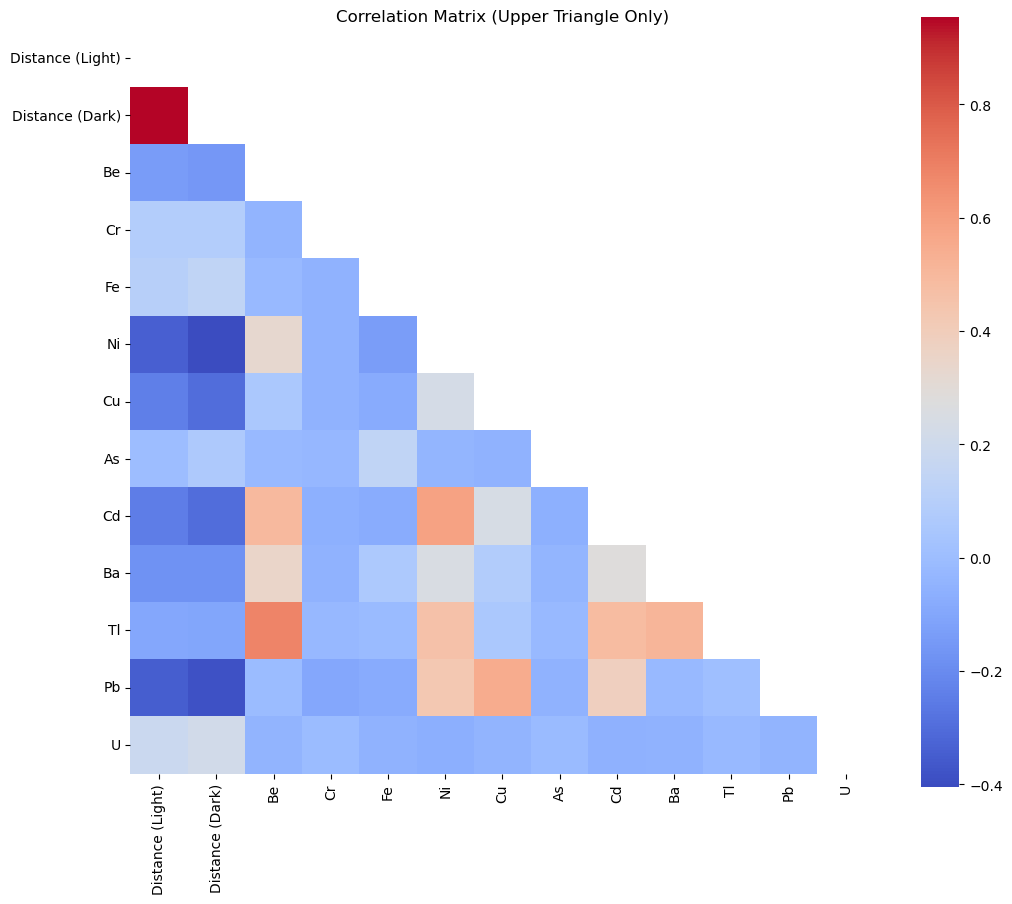

,Distance (Light),Distance (Dark),Be,Cr,Fe,Ni,Cu,As,Cd,Ba,Tl,Pb,U
Distance (Light),1.000000,0.954779,-0.139575,0.087457,0.104665,-0.342323,-0.240708,-0.005321,-0.248404,-0.175865,-0.100560,-0.350552,0.183887
Distance (Dark),0.954779,1.000000,-0.156968,0.088358,0.142551,-0.403946,-0.299148,0.066892,-0.300572,-0.178944,-0.103465,-0.386972,0.216287
Be,-0.139575,-0.156968,1.000000,-0.044709,-0.020571,0.327741,0.053815,-0.017736,0.498255,0.348849,0.681320,-0.006695,-0.046681
Cr,0.087457,0.088358,-0.044709,1.000000,-0.051486,-0.052640,-0.049969,-0.028214,-0.059986,-0.049297,-0.023664,-0.098125,-0.008109
Fe,0.104665,0.142551,-0.020571,-0.051486,1.000000,-0.136725,-0.082142,0.141206,-0.075684,0.062362,-0.012160,-0.083742,-0.049301
Ni,-0.342323,-0.403946,0.327741,-0.052640,-0.136725,1.000000,0.229745,-0.041218,0.583877,0.252520,0.461072,0.426866,-0.065923
Cu,-0.240708,-0.299148,0.053815,-0.049969,-0.082142,0.229745,1.000000,-0.051032,0.242394,0.080102,0.053280,0.546626,-0.044535
As,-0.005321,0.066892,-0.017736,-0.028214,0.141206,-0.041218,-0.051032,1.000000,-0.061020,-0.038385,-0.021247,-0.052319,-0.011885
Cd,-0.248404,-0.300572,0.498255,-0.059986,-0.075684,0.583877,0.242394,-0.061020,1.000000,0.285287,0.483705,0.384901,-0.056281
Ba,-0.175865,-0.178944,0.348849,-0.049297,0.062362,0.252520,0.080102,-0.038385,0.285287,1.000000,0.513383,-0.020808,-0.052403


In [22]:
# Calculate the correlation matrix
correlation_matrix = data.drop(columns=['Sample No']).corr()

# Create a mask to display only one triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Upper Triangle Only)")
plt.show()
correlation_matrix

- As we can observe Y1 - Distance (Light) and Y2 - Distance (Dark) have highly positve correlation of 0.954779. This suggests that they are capturing similar information, making it redundant to model them separately. So using a Multivariate Regression Models or use Principal Component Analysis (PCA) on Response Variables to combine them into a single composite variable would potentially allowing you to reduce the responses to one combined variable

- When observing predictor variables, We can't observe much high correlation between predictor variables

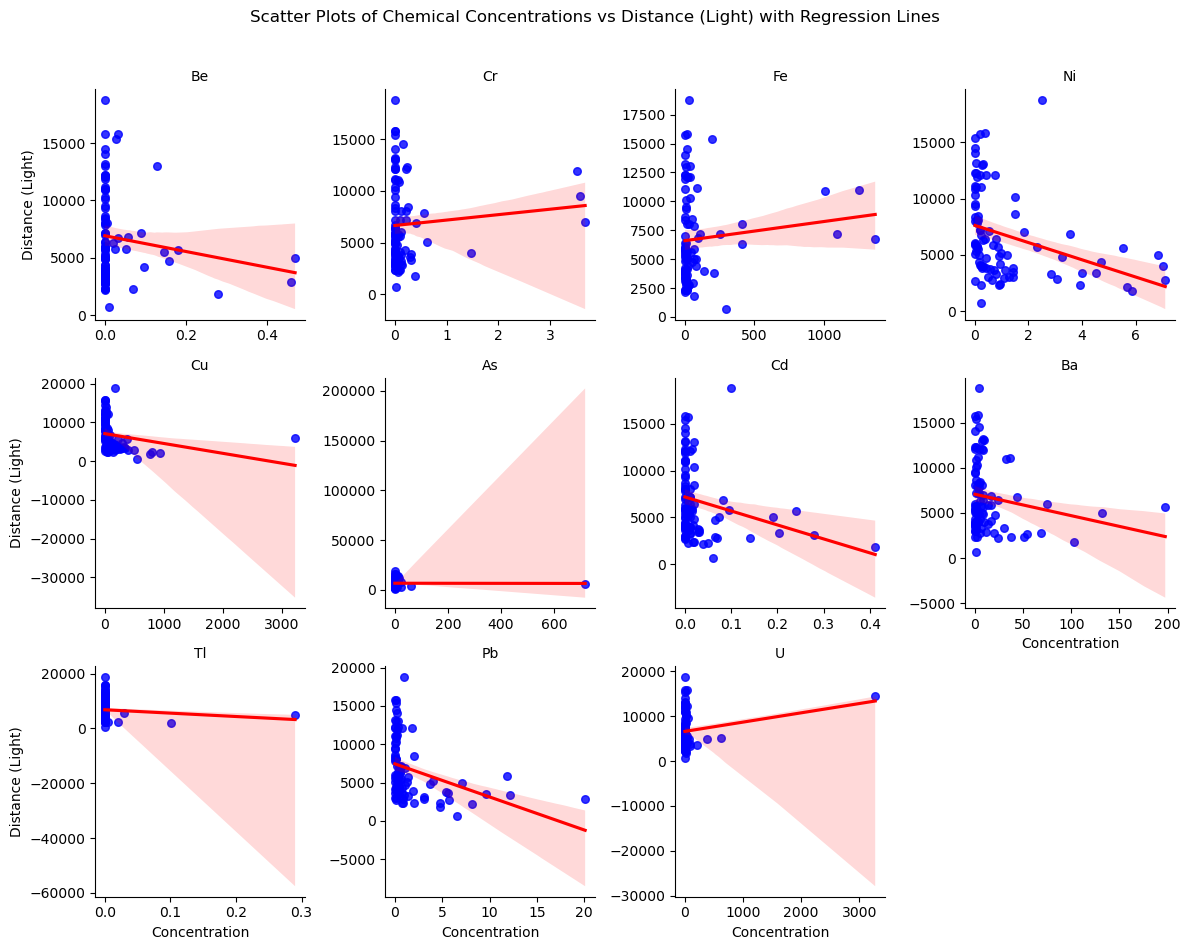

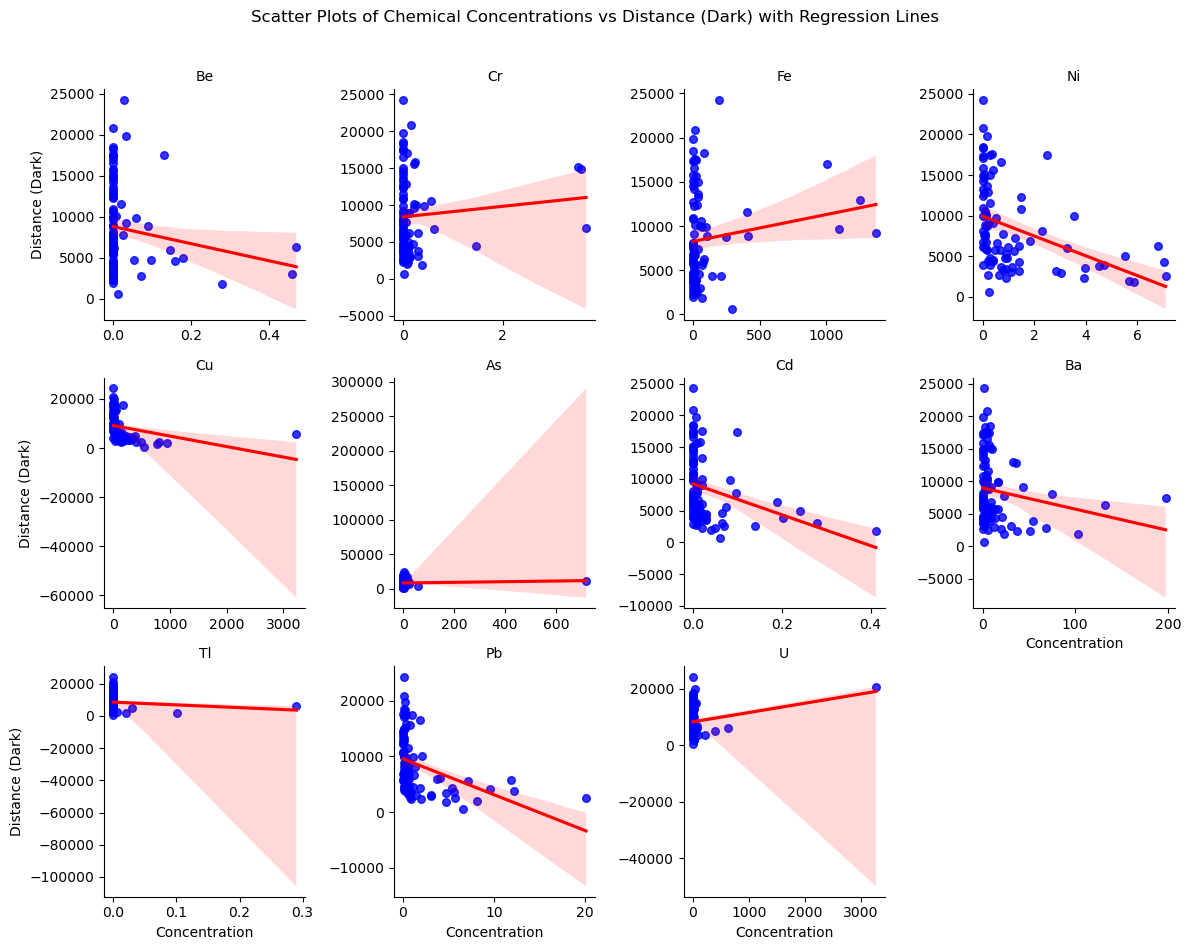

In [23]:
# Melt the data for Distance (Light) and Distance (Dark)
data_light = data.melt(id_vars=['Sample No', 'Distance (Light)'], 
                       value_vars=['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U'],
                       var_name='Chemical', value_name='Concentration')

data_dark = data.melt(id_vars=['Sample No', 'Distance (Dark)'], 
                      value_vars=['Be', 'Cr', 'Fe', 'Ni', 'Cu', 'As', 'Cd', 'Ba', 'Tl', 'Pb', 'U'],
                      var_name='Chemical', value_name='Concentration')

# Plot for Distance (Light) with independent scales and correlation lines
g_light = sns.FacetGrid(data_light, col='Chemical', col_wrap=4, height=3, sharex=False, sharey=False)
g_light.map(sns.regplot, 'Concentration', 'Distance (Light)', scatter_kws={'s': 30, 'color': 'blue'}, line_kws={'color': 'red'})
g_light.set_titles("{col_name}")
g_light.set_axis_labels("Concentration", "Distance (Light)")
g_light.fig.suptitle("Scatter Plots of Chemical Concentrations vs Distance (Light) with Regression Lines", y=1.05)
plt.show()

# Plot for Distance (Dark) with independent scales and correlation lines
g_dark = sns.FacetGrid(data_dark, col='Chemical', col_wrap=4, height=3, sharex=False, sharey=False)
g_dark.map(sns.regplot, 'Concentration', 'Distance (Dark)', scatter_kws={'s': 30, 'color': 'blue'}, line_kws={'color': 'red'})
g_dark.set_titles("{col_name}")
g_dark.set_axis_labels("Concentration", "Distance (Dark)")
g_dark.fig.suptitle("Scatter Plots of Chemical Concentrations vs Distance (Dark) with Regression Lines", y=1.05)
plt.show()
